<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install pycountry-convert

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Drop missing values in JobSat and RemoteWork
df_dropped = df.dropna(subset=['JobSat', 'RemoteWork'])

print("Original dataset shape:", df.shape)
print("After dropping JobSat and RemoteWork missing rows:", df_dropped.shape)

# Check how much of YearsCodePro is missing in this new cleaned version
missing_years = df_dropped['YearsCodePro'].isnull().sum()
print("\nMissing YearsCodePro in cleaned dataset:", missing_years)

df_dropped = df_dropped.dropna(subset=['YearsCodePro'])
missing_data_2 = df_dropped[['JobSat', 'YearsCodePro']].isnull().sum()
missing_data_2

df_dropped.shape

Original dataset shape: (65437, 114)
After dropping JobSat and RemoteWork missing rows: (29117, 114)

Missing YearsCodePro in cleaned dataset: 770


(28347, 114)

In [4]:
# Check for all values have changed
df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()


Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Median Job Satisfaction per Experience Range:
 ExperienceRange
0-5      7.0
6-10     7.0
11-20    8.0
21+      8.0
Name: JobSat, dtype: float64


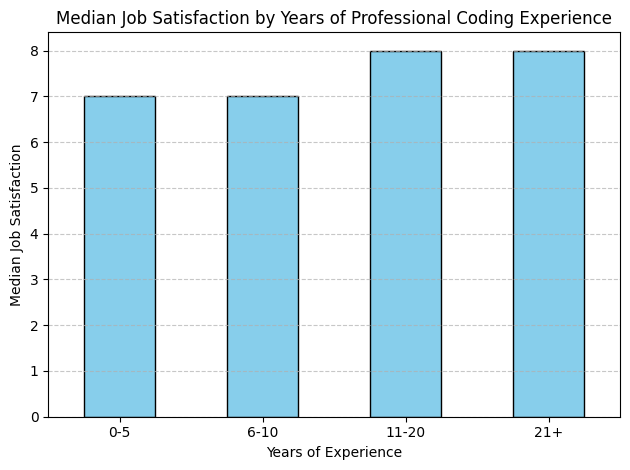

In [5]:
## Write your code here
# Clean and convert the data
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 55
})

df['YearsCodePro'] = df['YearsCodePro'].fillna(0)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'])

# Creating bins and labels for ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '6-10', '11-20', '21+']

# Creates column with ranges as values
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=True)

# Group by experience range and calculate median JobSat
median_job_sat = df.groupby('ExperienceRange', observed=True)['JobSat'].median()

# Display result
print("Median Job Satisfaction per Experience Range:\n", median_job_sat)

# Plots onto bar chart

median_job_sat.plot(kind='bar',
                    color='skyblue',
                    edgecolor='black'
)
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


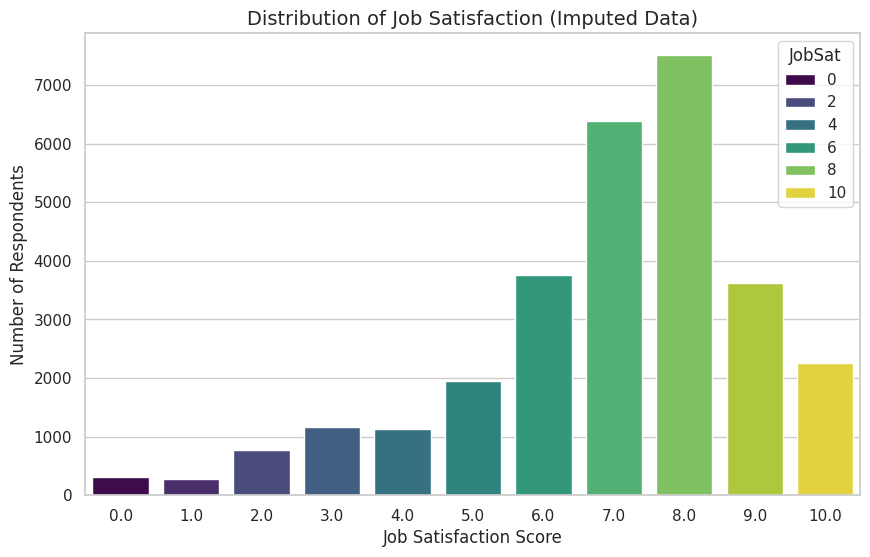

In [6]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the count plot
sns.countplot(data=df, x='JobSat', hue='JobSat', palette='viridis')

# Add titles and labels
plt.title('Distribution of Job Satisfaction (Imputed Data)', fontsize=14)
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')

# Show the plot
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


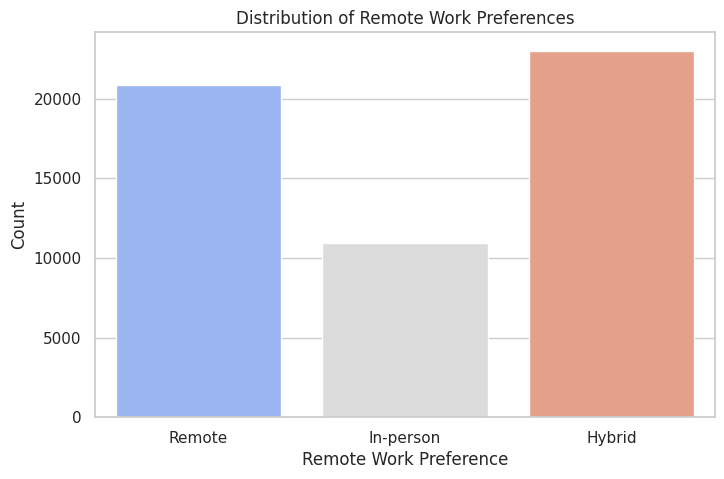


Remote Work Preference by Employment Type (%):

RemoteWork                                          Hybrid  In-person  Remote
Employment                                                                   
Employed, full-time                                   44.3       21.9    33.8
Employed, full-time;Employed, part-time               40.1       15.1    44.8
Employed, full-time;Independent contractor, fre...    37.4       10.3    52.3
Employed, full-time;Independent contractor, fre...    43.5        9.2    47.3
Employed, full-time;Independent contractor, fre...     0.0      100.0     0.0
...                                                    ...        ...     ...
Student, full-time;Not employed, but looking fo...    50.0        0.0    50.0
Student, full-time;Not employed, but looking fo...    40.0        0.0    60.0
Student, full-time;Not employed, but looking fo...   100.0        0.0     0.0
Student, full-time;Student, part-time;Employed,...    57.1       14.3    28.6
Student, part-t

In [7]:
## Write your code here
# Replace naming in RemoteWork
df['RemoteWork'] = df['RemoteWork'].replace({'Hybrid (some remote, some in-person)': 'Hybrid'})

# Plot countplot for values in RemoteWork
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', hue='RemoteWork', palette='coolwarm', legend=None)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Cross tabulation
employment_remote_ct = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
employment_remote_ct = employment_remote_ct.round(1)

print()
print("Remote Work Preference by Employment Type (%):\n")
print(employment_remote_ct)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [8]:
country_label = {
    'Aruba': 'ABW',
    'Afghanistan': 'AFG',
    'Angola': 'AGO',
    'Anguilla': 'AIA',
    'Åland Islands': 'ALA',
    'Albania': 'ALB',
    'Andorra': 'AND',
    'United Arab Emirates': 'ARE',
    'Argentina': 'ARG',
    'Armenia': 'ARM',
    'American Samoa': 'ASM',
    'Antarctica': 'ATA',
    'French Southern Territories': 'ATF',
    'Antigua and Barbuda': 'ATG',
    'Australia': 'AUS',
    'Austria': 'AUT',
    'Azerbaijan': 'AZE',
    'Burundi': 'BDI',
    'Belgium': 'BEL',
    'Benin': 'BEN',
    'Bonaire, Sint Eustatius and Saba': 'BES',
    'Burkina Faso': 'BFA',
    'Bangladesh': 'BGD',
    'Bulgaria': 'BGR',
    'Bahrain': 'BHR',
    'Bahamas': 'BHS',
    'Bosnia and Herzegovina': 'BIH',
    'Saint Barthélemy': 'BLM',
    'Belarus': 'BLR',
    'Belize': 'BLZ',
    'Bermuda': 'BMU',
    'Bolivia': 'BOL',
    'Bolivia, Plurinational State of': 'BOL',
    'Brazil': 'BRA',
    'Barbados': 'BRB',
    'Brunei Darussalam': 'BRN',
    'Bhutan': 'BTN',
    'Bouvet Island': 'BVT',
    'Botswana': 'BWA',
    'Central African Republic': 'CAF',
    'Canada': 'CAN',
    'Cocos (Keeling) Islands': 'CCK',
    'Switzerland': 'CHE',
    'Chile': 'CHL',
    'China': 'CHN',
    "Côte d'Ivoire": 'CIV',
    "Côte D'Ivoire": 'CIV',
    'Cameroon': 'CMR',
    'Congo, Democratic Republic of the': 'COD',
    'Democratic Republic of the Congo': 'COD',
    'Congo, Republic of the...': 'COG',
    'Congo': 'COG',
    'Cook Islands': 'COK',
    'Colombia': 'COL',
    'Comoros': 'COM',
    'Cabo Verde': 'CPV',
    'Cape Verde': 'CPV',
    'Costa Rica': 'CRI',
    'Cuba': 'CUB',
    'Curaçao': 'CUW',
    'Christmas Island': 'CXR',
    'Cayman Islands': 'CYM',
    'Cyprus': 'CYP',
    'Czechia': 'CZE',
    'Czech Republic': 'CZE',
    'Germany': 'DEU',
    'Djibouti': 'DJI',
    'Dominica': 'DMA',
    'Denmark': 'DNK',
    'Dominican Republic': 'DOM',
    'Algeria': 'DZA',
    'Ecuador': 'ECU',
    'Egypt': 'EGY',
    'Eritrea': 'ERI',
    'Western Sahara': 'ESH',
    'Spain': 'ESP',
    'Estonia': 'EST',
    'Ethiopia': 'ETH',
    'Finland': 'FIN',
    'Fiji': 'FJI',
    'Falkland Islands (Malvinas)': 'FLK',
    'France': 'FRA',
    'Faroe Islands': 'FRO',
    'Micronesia, Federated States of...': 'FSM',
    'Gabon': 'GAB',
    'United Kingdom of Great Britain and Northern Ireland': 'GBR',
    'Georgia': 'GEO',
    'Guernsey': 'GGY',
    'Ghana': 'GHA',
    'Gibraltar': 'GIB',
    'Guinea': 'GIN',
    'Guadeloupe': 'GLP',
    'Gambia': 'GMB',
    'Guinea-Bissau': 'GNB',
    'Equatorial Guinea': 'GNQ',
    'Greece': 'GRC',
    'Grenada': 'GRD',
    'Greenland': 'GRL',
    'Guatemala': 'GTM',
    'French Guiana': 'GUF',
    'Guam': 'GUM',
    'Guyana': 'GUY',
    'Hong Kong': 'HKG',
    'Hong Kong (S.A.R.)':'HKG',
    'Heard Island and McDonald Islands': 'HMD',
    'Honduras': 'HND',
    'Croatia': 'HRV',
    'Haiti': 'HTI',
    'Hungary': 'HUN',
    'Indonesia': 'IDN',
    'Isle of Man': 'IMN',
    'India': 'IND',
    'British Indian Ocean Territory': 'IOT',
    'Ireland': 'IRL',
    'Iran, Islamic Republic of...': 'IRN',
    'Iraq': 'IRQ',
    'Iceland': 'ISL',
    'Israel': 'ISR',
    'Italy': 'ITA',
    'Jamaica': 'JAM',
    'Jersey': 'JEY',
    'Jordan': 'JOR',
    'Japan': 'JPN',
    'Kazakhstan': 'KAZ',
    'Kenya': 'KEN',
    'Kyrgyzstan': 'KGZ',
    'Cambodia': 'KHM',
    'Kiribati': 'KIR',
    'Saint Kitts and Nevis': 'KNA',
    'Korea, Republic of': 'KOR',
    'Republic of Korea': 'KOR',
    'South Korea': 'KOR',
    'Kuwait': 'KWT',
    "Lao People's Democratic Republic": 'LAO',
    'Lebanon': 'LBN',
    'Liberia': 'LBR',
    'Libya': 'LBY',
    'Libyan Arab Jamahiriya': 'LBY',
    'Saint Lucia': 'LCA',
    'Liechtenstein': 'LIE',
    'Sri Lanka': 'LKA',
    'Lesotho': 'LSO',
    'Lithuania': 'LTU',
    'Luxembourg': 'LUX',
    'Latvia': 'LVA',
    'Macao': 'MAC',
    'Saint Martin (French part)': 'MAF',
    'Morocco': 'MAR',
    'Monaco': 'MCO',
    'Moldova, Republic of': 'MDA',
    'Republic of Moldova': 'MDA',
    'Madagascar': 'MDG',
    'Maldives': 'MDV',
    'Mexico': 'MEX',
    'Marshall Islands': 'MHL',
    'North Macedonia': 'MKD',
    'Republic of North Macedonia': 'MKD',
    'Mali': 'MLI',
    'Malta': 'MLT',
    'Myanmar': 'MMR',
    'Montenegro': 'MNE',
    'Mongolia': 'MNG',
    'Northern Mariana Islands': 'MNP',
    'Mozambique': 'MOZ',
    'Mauritania': 'MRT',
    'Montserrat': 'MSR',
    'Martinique': 'MTQ',
    'Mauritius': 'MUS',
    'Malawi': 'MWI',
    'Malaysia': 'MYS',
    'Mayotte': 'MYT',
    'Namibia': 'NAM',
    'New Caledonia': 'NCL',
    'Niger': 'NER',
    'Norfolk Island': 'NFK',
    'Nigeria': 'NGA',
    'Nicaragua': 'NIC',
    'Niue': 'NIU',
    'Netherlands, Kingdom of the': 'NLD',
    'Netherlands': 'NLD', 
    'Norway': 'NOR',
    'Nepal': 'NPL',
    'Nauru': 'NRU',
    'New Zealand': 'NZL',
    'Oman': 'OMN',
    'Pakistan': 'PAK',
    'Panama': 'PAN',
    'Pitcairn': 'PCN',
    'Peru': 'PER',
    'Philippines': 'PHL',
    'Palau': 'PLW',
    'Papua New Guinea': 'PNG',
    'Poland': 'POL',
    'Puerto Rico': 'PRI',
    "Korea, Democratic People's Republic of": 'PRK',
    'North Korea':'PRK',
    "Democratic People's Republic of Korea": 'PRK',
    'Kosovo': 'XKX',
    ' Kosovo': 'XKX',
    'Kosovo ': 'XKX',
    'Portugal': 'PRT',
    'Paraguay': 'PRY',
    'Palestine, State of': 'PSE',
    'Palestine': 'PSE',
    'French Polynesia': 'PYF',
    'Qatar': 'QAT',
    'Réunion': 'REU',
    'Romania': 'ROU',
    'Russian Federation': 'RUS',
    'Rwanda': 'RWA',
    'Saudi Arabia': 'SAU',
    'Sudan': 'SDN',
    'Senegal': 'SEN',
    'Singapore': 'SGP',
    'South Georgia and the South Sandwich Islands': 'SGS',
    'Saint Helena, Ascension and Tristan da Cunha': 'SHN',
    'Svalbard and Jan Mayen': 'SJM',
    'Solomon Islands': 'SLB',
    'Sierra Leone': 'SLE',
    'El Salvador': 'SLV',
    'San Marino': 'SMR',
    'Somalia': 'SOM',
    'Saint Pierre and Miquelon': 'SPM',
    'Serbia': 'SRB',
    'South Sudan': 'SSD',
    'Sao Tome and Principe': 'STP',
    'Suriname': 'SUR',
    'Slovakia': 'SVK',
    'Slovenia': 'SVN',
    'Sweden': 'SWE',
    'Eswatini': 'SWZ',
    'Swaziland': 'SWZ',
    'Sint Maarten (Dutch part)': 'SXM',
    'Seychelles': 'SYC',
    'Syrian Arab Republic': 'SYR',
    'Turks and Caicos Islands': 'TCA',
    'Chad': 'TCD',
    'Togo': 'TGO',
    'Thailand': 'THA',
    'Tajikistan': 'TJK',
    'Tokelau': 'TKL',
    'Turkmenistan': 'TKM',
    'Timor-Leste': 'TLS',
    'Tonga': 'TON',
    'Trinidad and Tobago': 'TTO',
    'Tunisia': 'TUN',
    'Türkiye': 'TUR',
    'Turkey': 'TUR',
    'Tuvalu': 'TUV',
    'Taiwan, Province of China': 'TWN',
    'Taiwan': 'TWN',
    'Tanzania, United Republic of': 'TZA',
    'United Republic of Tanzania': 'TZA',
    'Uganda': 'UGA',
    'Ukraine': 'UKR',
    'United States Minor Outlying Islands': 'UMI',
    'Uruguay': 'URY',
    'United States of America': 'USA',
    'Uzbekistan': 'UZB',
    'Holy See': 'VAT',
    'Saint Vincent and the Grenadines': 'VCT',
    'Venezuela, Bolivarian Republic of...': 'VEN',
    'Virgin Islands (British)': 'VGB',
    'Virgin Islands (U.S.)': 'VIR',
    'Viet Nam': 'VNM',
    'Vanuatu': 'VUT',
    'Wallis and Futuna': 'WLF',
    'Samoa': 'WSM',
    'Yemen': 'YEM',
    'South Africa': 'ZAF',
    'Zambia': 'ZMB',
    'Zimbabwe': 'ZWE',
}

def alpha3_to_continent(alpha3):
    try:
        alpha2 = pc.country_alpha3_to_country_alpha2(alpha3)
        cont_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(cont_code)
    except:
        return 'Unknown'

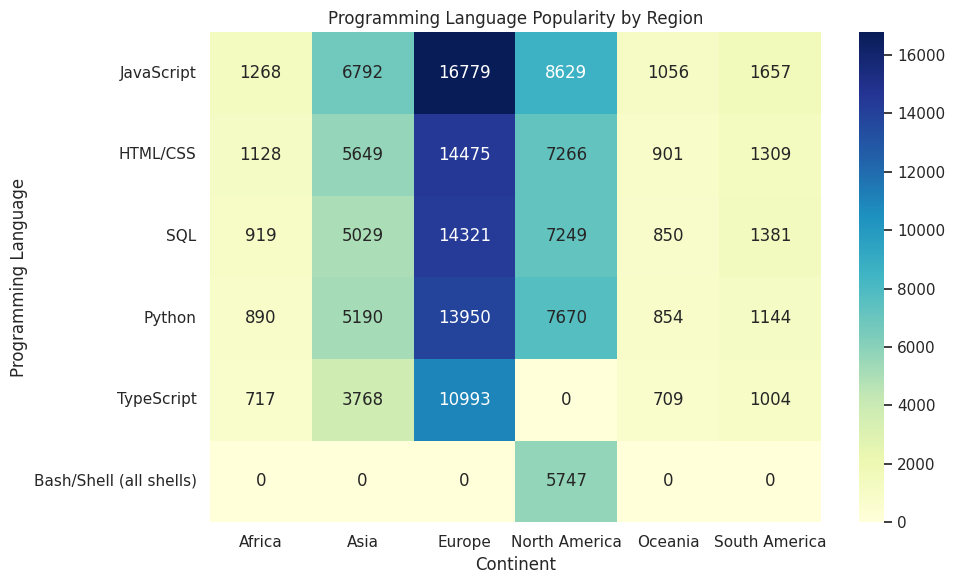

In [9]:
## Write your code here
# Check values of column
df['LanguageHaveWorkedWith'].value_counts()

# Cleaning data for Language
df_cleaned = df[['Country', 'LanguageHaveWorkedWith']].dropna()
df_cleaned['LanguageHaveWorkedWith'] = df_cleaned['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_cleaned.explode('LanguageHaveWorkedWith')

# Changing naming convention for Country data
df_exploded['Country_ISO3'] = df_exploded['Country'].map(country_label)

# Adding column for Continent
df_exploded['Continent'] = df_exploded['Country_ISO3'].apply(alpha3_to_continent)

# Grouping
lang_region_counts = df_exploded.groupby(['Continent', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')
lang_region_counts = lang_region_counts[lang_region_counts['Continent'] != 'Unknown']

# Get top 5 languages per continent
top_lang_per_continent = (
    lang_region_counts
    .sort_values(['Continent', 'Count'], ascending=[True, False])
    .groupby('Continent')
    .head(5)
)

# Pivot to create a matrix of languages vs continent
heatmap_data = (
    top_lang_per_continent
    .pivot_table(
        index='LanguageHaveWorkedWith',
        columns='Continent',
        values='Count',
        aggfunc='sum',
        fill_value=0
    )
)

# Optional: Limit to top 10 languages overall for readability
top_langs = heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index
heatmap_data = heatmap_data.loc[top_langs]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Programming Language Popularity by Region')
plt.xlabel('Continent')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


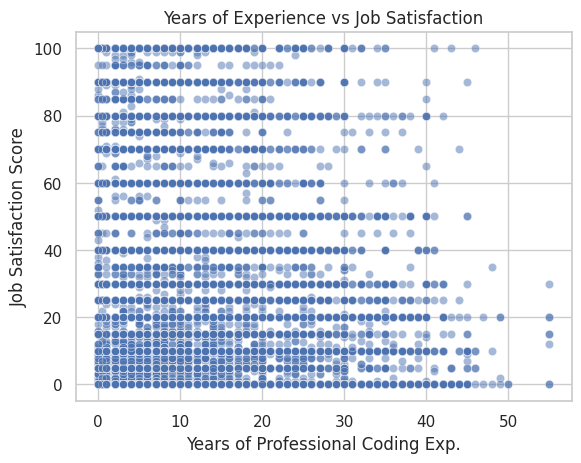

In [10]:
## Write your code here
# Create df with columns we need, dropping NaN and re-indexing
df_code_sat = df[['YearsCodePro', 'JobSatPoints_1']].dropna()
df_code_sat = df_code_sat.reset_index(drop=True)

# Plotting
sns.scatterplot(data=df_code_sat, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Years of Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Exp.')
plt.ylabel('Job Satisfaction Score')
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


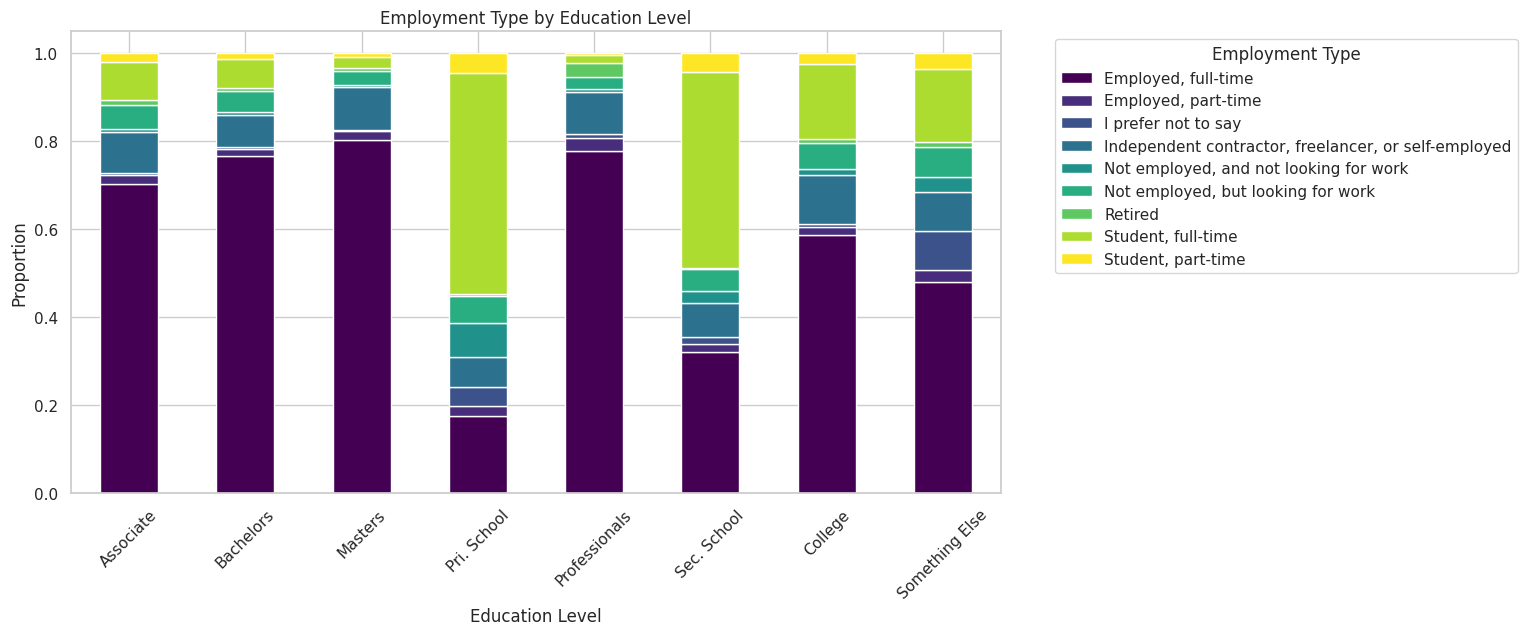

In [11]:
## Write your code here
# Checking for missing values in original dataset
df['EdLevel'].isnull().sum()
df['Employment'].isnull().sum()

'''
Based on this small factor, we will drop missing values
4.6k from EdLevel is missing, but small comparable to full
data set of 64k. Overall, 93% will be used.
'''

# Dropping NaN and reseting index
df_ed_employ = df[['EdLevel', 'Employment']].dropna()
df_ed_employ = df_ed_employ.reset_index()

# As shown, the data is quite messy for employment.
df_ed_employ['EdLevel'].value_counts()
df_ed_employ['Employment'].value_counts()

# Cleaning data
df_ed_employ['EmploymentPrimary'] = df_ed_employ['Employment'].str.split(';').str[0].str.strip()

# Plotting
edu_emp_ct = pd.crosstab(df_ed_employ['EdLevel'], df_ed_employ['EmploymentPrimary'], normalize='index')
ax = edu_emp_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
ax.set_xticklabels([
    'Associate',
    'Bachelors',
    'Masters',
    'Pri. School',
    'Professionals',
    'Sec. School',
    'College',
    'Something Else'
], rotation = 45)
plt.title('Employment Type by Education Level')
plt.ylabel('Proportion')
plt.xlabel('Education Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [12]:
## Write your code here
'''
Most of the datasets used for visuals where sliced or copied
from the original dataset as I found this to be best practice.
Perserving the original data but reapplying the code on what
is needed for future use. Saving the last dataset for last visual
to csv.
'''
df_ed_employ.to_csv('employment_type_by_edu_level_dataset.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
